<a href="https://colab.research.google.com/github/CountryBird/AI/blob/main/CNN%EC%9D%84_%ED%86%B5%ED%95%9C_%EA%B8%80%EC%9E%90_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://daechu.tistory.com/9를 참고했습니다.

In [18]:
import tensorflow as tf
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras import layers

mnist=tf.keras.datasets.mnist # 데이터 가져오기

(x_train,y_train),(x_test,y_test)=mnist.load_data() # 훈련용 데이터와 테스트용 데이터 만들기
x_train,x_test=x_train/255.0,x_test/255.0 # 데이터의 형식이 rgb값, 즉 255형태로 가져오기 때문에, 0~1 사이값으로 변환

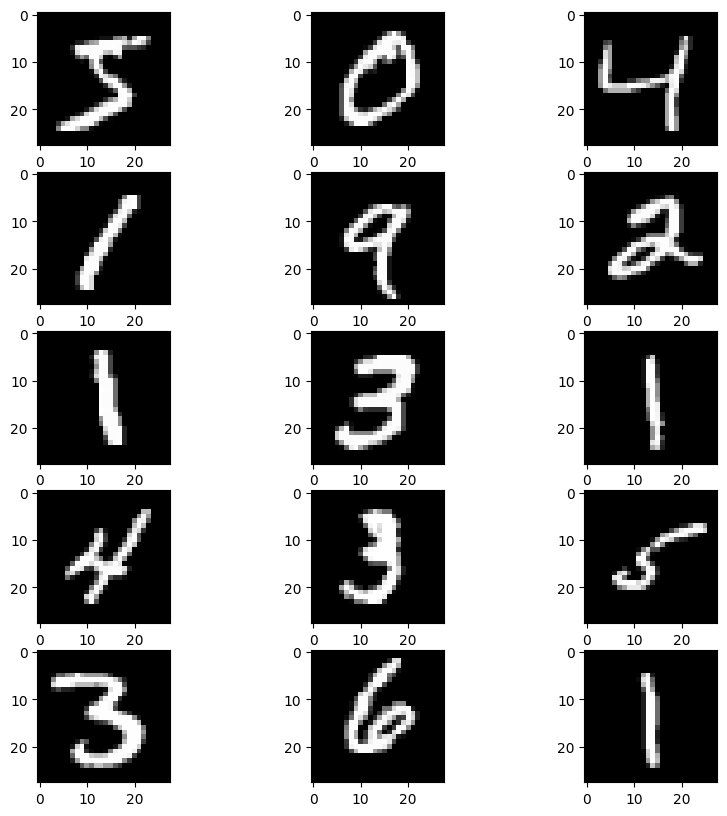

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) #그림 크기 지정
c=0
for x in range(5):
  for y in range(3):
    plt.subplot(5,3,c+1)
    plt.imshow(x_train[c],cmap='gray')
    c+=1
plt.show() # 데이터를 보여줌
print(y_train[:15]) # 각 데이터에 대한 정답값

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=64),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=32),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 옵티마이저 및 손실함수 설정, 컴파일

model.summary() #표로 출력
print(model.fit(x_train,y_train,epochs=5))
print(model.evaluate(x_test,y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 15488)             0         
                                                                 
 dense_10 (Dense)            (None, 64)               

313/313 [==============================] - 9s 28ms/step
[0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 189, 190, 191, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,

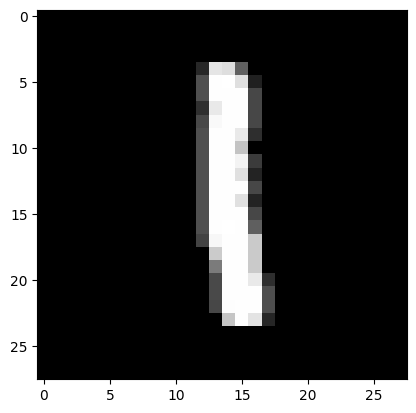

In [19]:
wrong_index_list=[]
predict = model.predict(x_test)
for index in range(10000):
    if np.argmax(y_test[index]) != np.argmax(predict[index]):
        wrong_index_list.append(index)
print(wrong_index_list)
print("총 틀린 갯수 : ",len(wrong_index_list))

new_index = random.choice(wrong_index_list)
plt.imshow(x_test[new_index],cmap="gray")
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[new_index]),np.argmax(new_index)),)